# 🎬 Activation Function
*Make output non-linear understandable.*

##### 

###  We saw that
The sigmoid activation function does several important things for us:
- It maps the inputs to the values always between **0 and 1**.
- Makes our neural network **non-linear**.

**But,**
- It only converts approx -10 to 10 ranged values to 0, 1 and in between
- Values after them becomes either 0 or 1
- So, it doesn't work *relatively*.
- Meaning, if we have data with 1M to 5M then all of their output will be 1.
- While other feature which has range between 0, 5 will have some output between 0 to 1.
- The values will be **centered around** 0.5 instead of 0 which is the case in the standardization.

Let's do some vizzes to drive point home.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams["figure.dpi"] = 100

## `1.` Sigmoid

# $$\sigma(x) = \frac{1}{1 + exp(-x)}$$

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

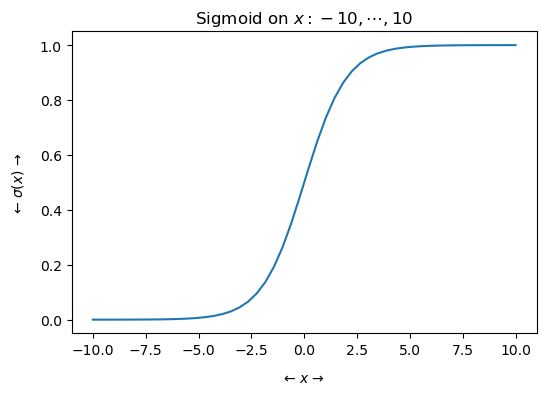

In [3]:
# data between -10 to 10
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid on $x: -10, \cdots, 10$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $\sigma(x)$ →", labelpad=10);

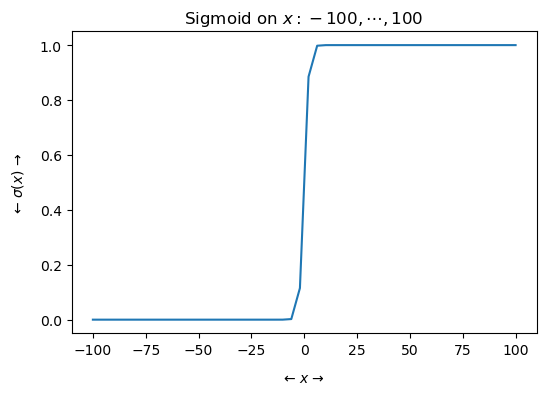

In [4]:
# data between -100 to 100
x = np.linspace(-100, 100)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid on $x: -100, \cdots, 100$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $\sigma(x)$ →", labelpad=10);

See? This sometimes isn't helpful.

> But we ***can*** solve the **last** issue in the list of sigmoid issues listed above called: *"The values will be centered around 0.5 instead of 0 which is the case in the standardization."*

We can use the `tanh()` activation function just shown below.

###### 

## `2.` Hyperbolic tangent (tanh)
See, I don't really understand this *hyperbolic* stuff... but the intuition is that, it ***shifts*** the sigmoid function vertically & scales output between -1 and 1.

# $$tanh(x) = \frac{exp(2x) - 1}{exp(2x) + 1}$$ 

I don't really know how these crazy mathemeticians come up with such equations... like what is going in their mind? $exp(2x)$ ? 

Of course, there are papers etc. but let's see its visualization.

In [5]:
def tanh(x):
    return (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)

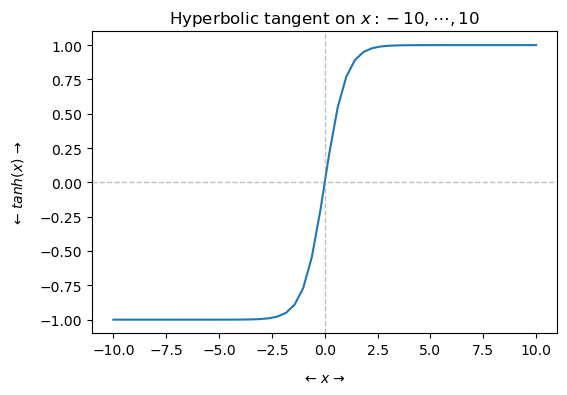

In [6]:
# data between -10 to 10
x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.title("Hyperbolic tangent on $x: -10, \cdots, 10$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $tanh(x)$ →", labelpad=10);

line_kwarg = dict(ls="--", lw=1, color='grey', alpha=0.5)
plt.axvline(0, **line_kwarg)
plt.axhline(0, **line_kwarg);

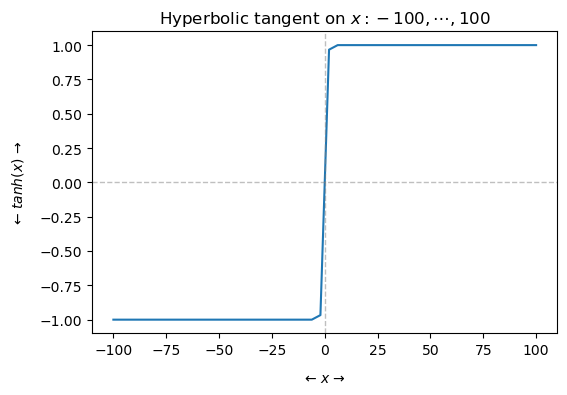

In [7]:
# data between -100 to 100
x = np.linspace(-100, 100)
plt.plot(x, tanh(x))
plt.title("Hyperbolic tangent on $x: -100, \cdots, 100$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $tanh(x)$ →", labelpad=10);

line_kwarg = dict(ls="--", lw=1, color='grey', alpha=0.5)
plt.axvline(0, **line_kwarg)
plt.axhline(0, **line_kwarg);

See?
- `tanh` shifts the sigmoid shape vertically between -1 and 1.
- So that the "center" value is now 0.

### 🙄 But...
There still is the problem with these *(sigmoid, tanh)* activation functions. The **major problem** with these functions is **"Vanishing Gradient"** problem.

- Our method of training is **gradient descent**.
- The problem is when we have **very deep** neural network.
- The **deeper** teh netural network is, the **more terms** have to be multiplied in the gradient due to the **chain rule** of calculus.
    - Our output is *made up* of a stack of compusite functions
    - $\text{output} = \sigma(\sigma(\sigma(\sigma(\sigma(\sigma(\cdots))))))$
- When we get the **gradient** of these composite functions, the **chain rule** is there.

> "*The further you go deep in the neural network, <br>the more terms that you have in the chain rule to multiply*"

**The problem is... when you multiply a number with really a smaller number ($|0 < x < 1|$) the result is *even* smaller number**.

> "*The further you go deep in the neural network, <br>the smaller the gradient becomes. And this is called "**Vanishing gradient problem***" <br> <br> — Author 

___

It seems like the problem that we were facing in the hypothesis testing **without** ANOVA! Here is a picture that shows how going further in the deep layers make the gradient even smaller.

<img src="../images/smaller-gradient.png" height=300 width=400>

## 🔬 Solution?
It is simple. <br>
Just don't use the activation function where the value leads to vanishing gradient!

- Instead of using the *pretty* activation functions like `tanh` and `sigmoid` use other functions like `ReLU`.
- *(Reloou)*

## `3.` Rectifier Linear Unit (ReLU)

And it is... <br>
<img src="../images/ReLU.png" width=400 height=300>

# $$ReLU(x) = \max(0, x)$$ 

In [8]:
def ReLU(x):
    return np.where(x > 0, x, 0)

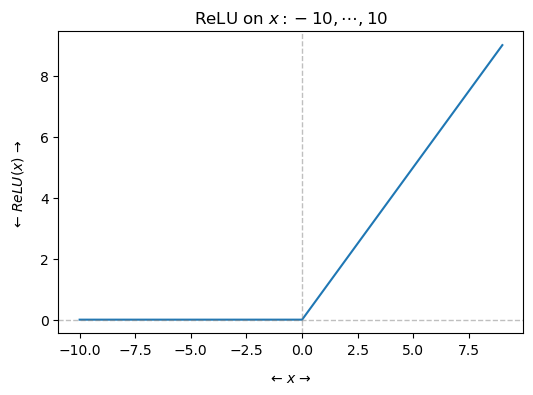

In [9]:
# data between -10 to 10
x = np.arange(-10, 10)
plt.plot(x, ReLU(x))
plt.title("ReLU on $x: -10, \cdots, 10$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $ReLU(x)$ →", labelpad=10);

line_kwarg = dict(ls="--", lw=1, color='grey', alpha=0.5)
plt.axvline(0, **line_kwarg)
plt.axhline(0, **line_kwarg);

🤔 You might ask... *(might)*

**Q.** "Okay, but how does it deal with the **vanishing gradient** problem? The points which are between 0 and 1 will always cause the vanishing problem. Isn't it?"

**A.** The thought is correct. It does. But it doesn't.

Because, the points which are **small** are **already vanished!**. And they cause the  "dead neuron". They are the neurons which output always smaller number. 

### Fixing dead neurons
I find this field has a pattern of finding **solution** which solves something but comes up with a problem. That solution itself brings another problem and to solve that, we have **another solution**. And repeating it enough times, we have a ton of solutions — each of them solves problem of each other but none of them works perfectly.

Yeah, that whole sentence came to me... I don't know why. Let's see a **fix** for these dead neurons.

## `4.` Leaky Rectifier Linear Unit (LReLU)

It has some **slope** for the values less than 0. That can be chosen before hand.

## $$
\text{LReLU} = 
\left\{ 
  \begin{array}{ c l }
    x \times \text{slope} & \quad \text{if } x \lt 0 \\
    x                 & \quad \text{otherwise}
  \end{array}
\right.
$$

In [10]:
def LReLU(x, slope=0.1):
    return np.where(x > 0, x, slope * x)

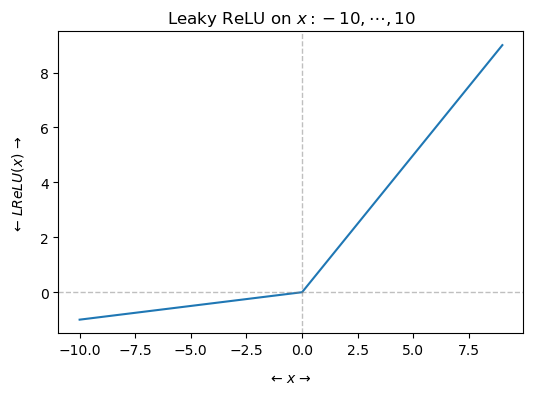

In [11]:
# data between -10 to 10
x = np.arange(-10, 10)
plt.plot(x, LReLU(x))
plt.title("Leaky ReLU on $x: -10, \cdots, 10$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $LReLU(x)$ →", labelpad=10);

line_kwarg = dict(ls="--", lw=1, color='grey', alpha=0.5)
plt.axvline(0, **line_kwarg)
plt.axhline(0, **line_kwarg);

## `5.` Exponential Linear Unit (ELU)
- This is another guy who solves problem differently.
- Authors do claim that these small tweak speed up the learning and provides better accuracy.

## $$
\text{ELU} = 
\left\{ 
  \begin{array}{ c l }
    \text{slope}(e^x - 1)& \quad \text{if } x \lt 0 \\
    x                 & \quad \text{otherwise}
  \end{array}
\right.
$$

In [12]:
def ELU(x, slope=0.1):
    return np.where(x > 0, x, slope * (np.exp(x) - 1))

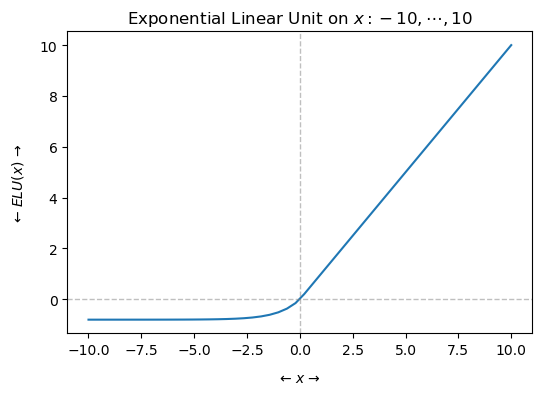

In [13]:
# data between -10 to 10
x = np.linspace(-10, 10)
plt.plot(x, ELU(x, slope=0.8))
plt.title("Exponential Linear Unit on $x: -10, \cdots, 10$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $ELU(x)$ →", labelpad=10);

line_kwarg = dict(ls="--", lw=1, color='grey', alpha=0.5)
plt.axvline(0, **line_kwarg)
plt.axhline(0, **line_kwarg);

See? It is smoother line.

## `6.` Softplus
It takes the *log* of the *exponented* value. Thus, the output looks *linear* for the large values.

# $$\text{softplus} = log(1 + e^x)$$

In [14]:
def softmax(x):
    return np.log(1 + np.exp(x))

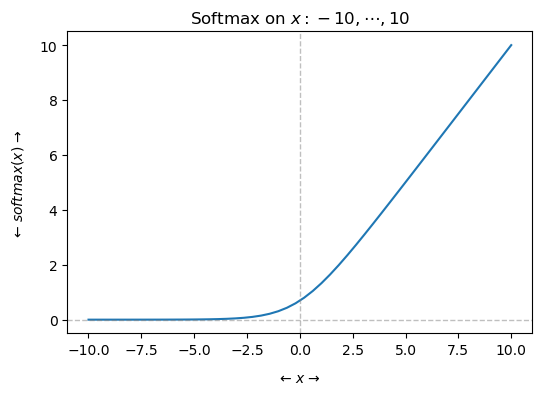

In [15]:
# data between -10 to 10
x = np.linspace(-10, 10)
plt.plot(x, softmax(x))
plt.title("Softmax on $x: -10, \cdots, 10$")
plt.xlabel("← $x$ →", labelpad=10)
plt.ylabel("← $softmax(x)$ →", labelpad=10);

line_kwarg = dict(ls="--", lw=1, color='grey', alpha=0.5)
plt.axvline(0, **line_kwarg)
plt.axhline(0, **line_kwarg);

#### For both `softplus` and `ELU`
There are the vanishing gradients on the left side... but stince the ReLU works, these both also should not be problematic.

# 

# Amazing.
I know. Let's see something next. Remember, we are collecting the pieces together to build something large. Foundation has to be strong right? And it is for the deep learning.